In [49]:
import pandas as pd


In [50]:
feat_gpdc_10 = pd.read_csv('/home/gnicolaou/tigramite/tigramite/simulations_results/feature_selection_gpdc_10.csv')
feat_gpdc_15 = pd.read_csv('/home/gnicolaou/tigramite/tigramite/simulations_results/feature_selection_gpdc_15.csv')
feat_gpdc_5 = pd.read_csv('/home/gnicolaou/tigramite/tigramite/simulations_results/feature_selection_gpdc_5.csv')
feat_cmiknn_5 = pd.read_csv('/home/gnicolaou/tigramite/tigramite/simulations_results/feature_selection_cmiknn_5.csv')
feat_cmiknn_10 = pd.read_csv('/home/gnicolaou/tigramite/tigramite/simulations_results/feature_selection_cmiknn_10.csv')
feat_cmiknn_15 = pd.read_csv('/home/gnicolaou/tigramite/tigramite/simulations_results/feature_selection_cmiknn_15.csv')
cmiknn_5 = pd.read_csv('/home/gnicolaou/tigramite/tigramite/simulations_results/cmiknn_5.csv')
cmiknn_10 = pd.read_csv('/home/gnicolaou/tigramite/tigramite/simulations_results/cmiknn_10.csv')
gpdc_5 = pd.read_csv('/home/gnicolaou/tigramite/tigramite/simulations_results/gpdc_5.csv')
gpdc_10 = pd.read_csv('/home/gnicolaou/tigramite/tigramite/simulations_results/gpdc_10.csv')
gpdc_15 = pd.read_csv('/home/gnicolaou/tigramite/tigramite/simulations_results/gpdc_15.csv')

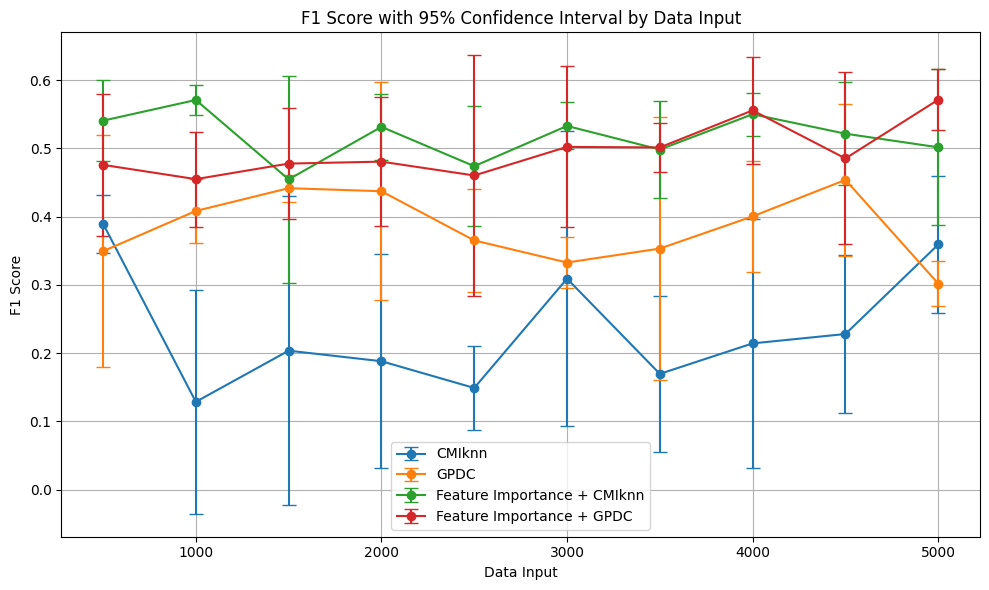

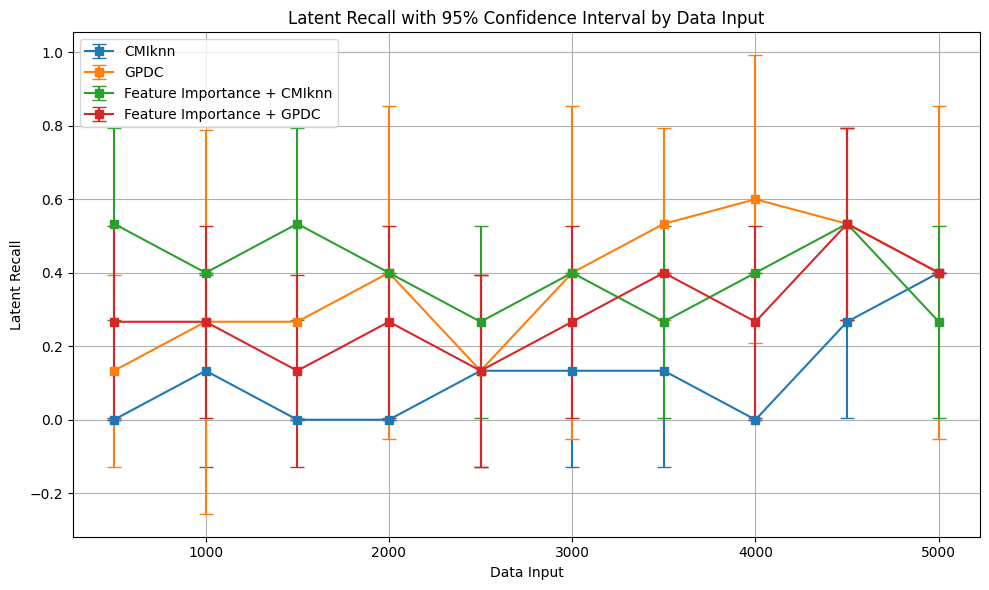

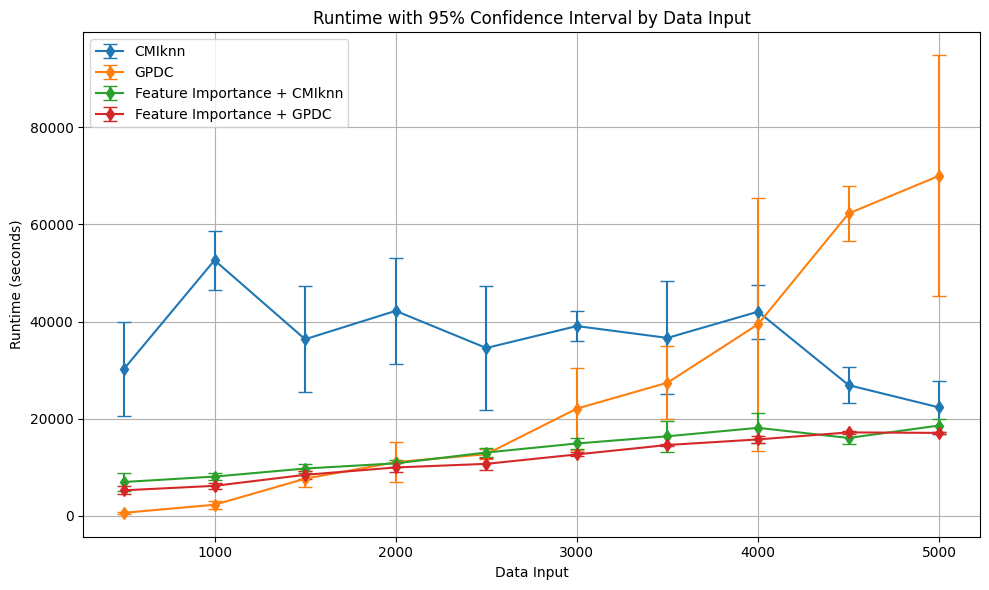

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Combine all data into a dictionary for easy iteration
methods = {
    'CMIknn': cmiknn_5,
    'GPDC': gpdc_5,
    'Feature Importance + CMIknn': feat_cmiknn_5,
    'Feature Importance + GPDC': feat_gpdc_5,
}

# Function to compute 95% confidence intervals
def compute_confidence_interval(df, column):
    agg_df = df.groupby('Data').agg(
        mean=(column, 'mean'),
        std=(column, 'std'),
        count=(column, 'count')
    )
    # Compute standard error and confidence intervals
    agg_df['sem'] = agg_df['std'] / np.sqrt(agg_df['count'])
    agg_df['ci'] = 1.96 * agg_df['sem']  # 95% confidence interval
    return agg_df

# Visualization: F1 Score with 95% CI
plt.figure(figsize=(10, 6))
for method, df in methods.items():
    agg_data = compute_confidence_interval(df, 'F1 Score')
    plt.errorbar(agg_data.index, agg_data['mean'], yerr=agg_data['ci'], label=method, marker='o', capsize=5)

plt.title('F1 Score with 95% Confidence Interval by Data Input')
plt.xlabel('Data Input')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization: Latent Recall with 95% CI
plt.figure(figsize=(10, 6))
for method, df in methods.items():
    agg_data = compute_confidence_interval(df, 'Recall')
    plt.errorbar(agg_data.index, agg_data['mean'], yerr=agg_data['ci'], label=method, marker='s', capsize=5)

plt.title('Latent Recall with 95% Confidence Interval by Data Input')
plt.xlabel('Data Input')
plt.ylabel('Latent Recall')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization: Runtime with 95% CI
plt.figure(figsize=(10, 6))
for method, df in methods.items():
    agg_data = compute_confidence_interval(df, 'Elapsed Time (s)')
    plt.errorbar(agg_data.index, agg_data['mean'], yerr=agg_data['ci'], label=method, marker='d', capsize=5)

plt.title('Runtime with 95% Confidence Interval by Data Input')
plt.xlabel('Data Input')
plt.ylabel('Runtime (seconds)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

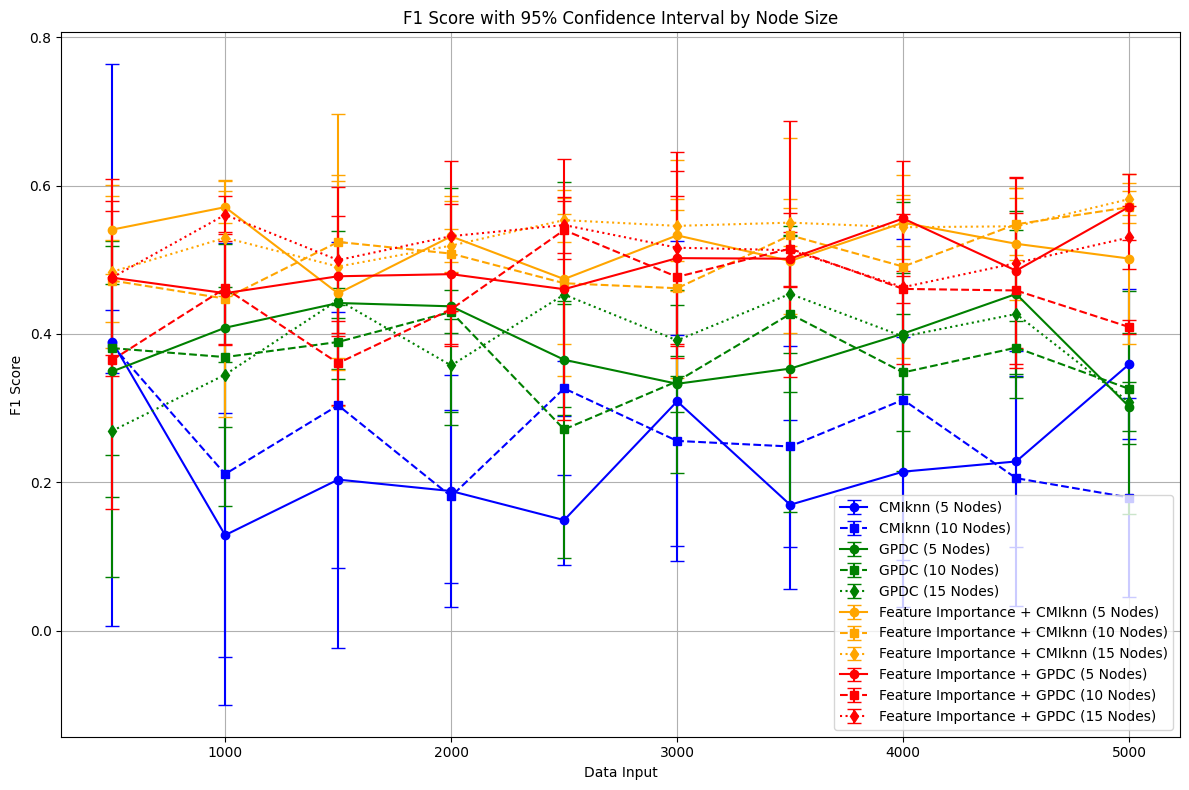

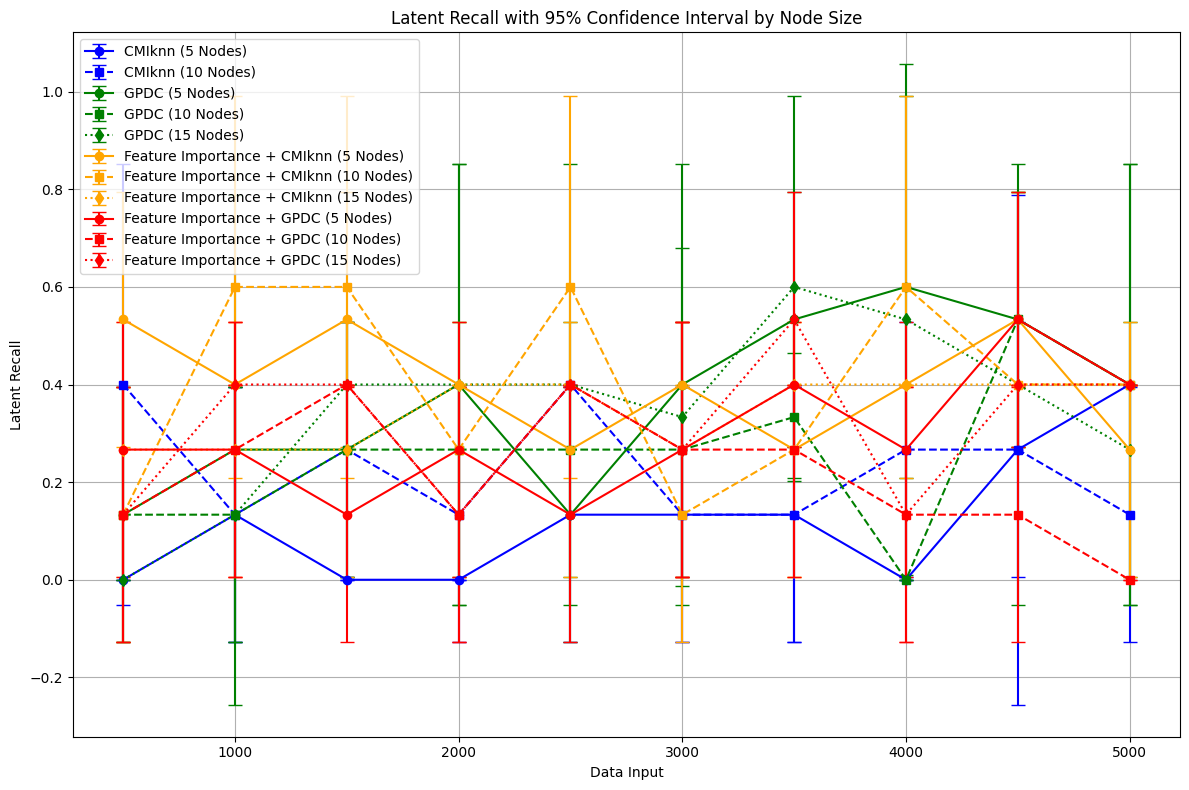

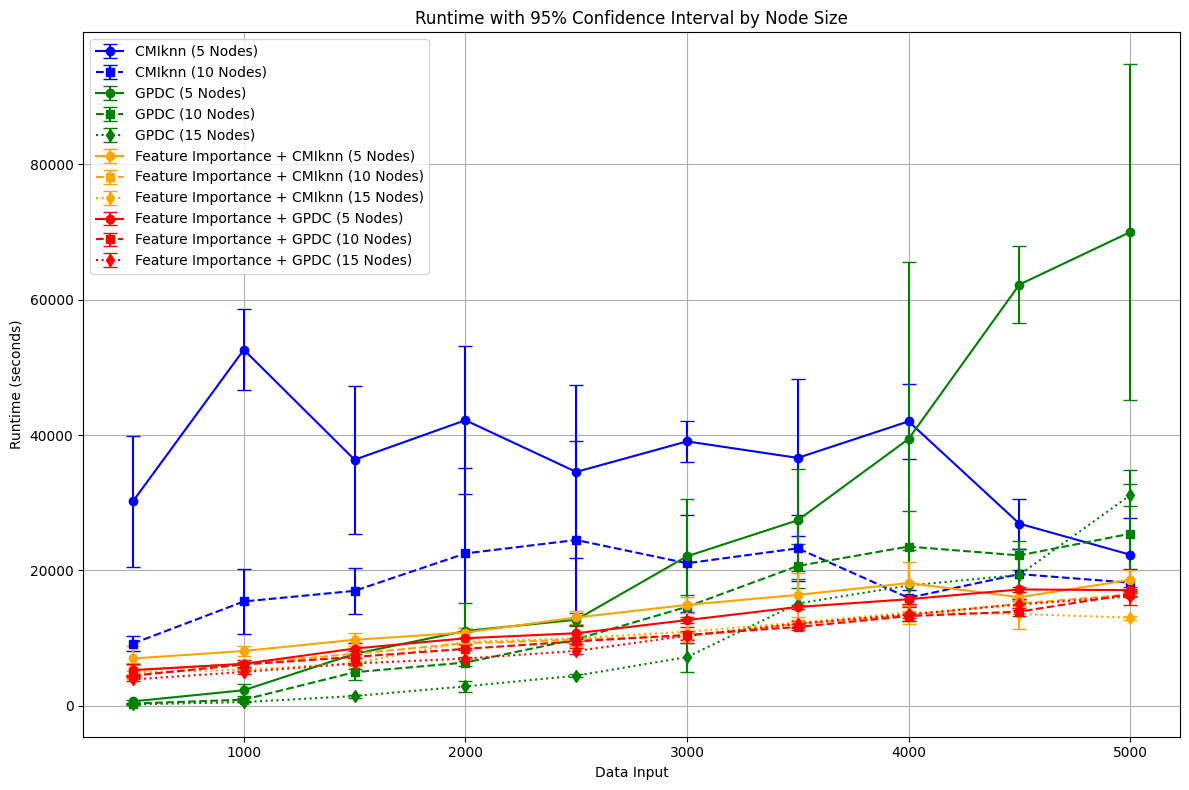

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Example data structure for different node sizes
node_sizes = ['5 Nodes', '10 Nodes', '15 Nodes']

methods = {
    'CMIknn': {'5 Nodes': cmiknn_5, '10 Nodes': cmiknn_10},#, '15 Nodes': cmiknn_15},
    'GPDC': {'5 Nodes': gpdc_5, '10 Nodes': gpdc_10, '15 Nodes': gpdc_15},
    'Feature Importance + CMIknn': {'5 Nodes': feat_cmiknn_5, '10 Nodes': feat_cmiknn_10, '15 Nodes': feat_cmiknn_15},
    'Feature Importance + GPDC': {'5 Nodes': feat_gpdc_5, '10 Nodes': feat_gpdc_10, '15 Nodes': feat_gpdc_15},
}

# Function to compute 95% confidence intervals
def compute_confidence_interval(df, column):
    agg_df = df.groupby('Data').agg(
        mean=(column, 'mean'),
        std=(column, 'std'),
        count=(column, 'count')
    )
    # Compute standard error and confidence intervals
    agg_df['sem'] = agg_df['std'] / np.sqrt(agg_df['count'])
    agg_df['ci'] = 1.96 * agg_df['sem']  # 95% confidence interval
    return agg_df

# Plot configuration
line_styles = ['solid', 'dashed', 'dotted']
markers = ['o', 's', 'd']
colors = ['blue', 'green', 'orange', 'red']  # One color per method

# Visualization function for metrics
def plot_metric(metric, ylabel, title):
    plt.figure(figsize=(12, 8))
    
    for method_idx, (method, data_by_nodes) in enumerate(methods.items()):
        color = colors[method_idx]
        for node_idx, (node_size, df) in enumerate(data_by_nodes.items()):
            agg_data = compute_confidence_interval(df, metric)
            plt.errorbar(
                agg_data.index,
                agg_data['mean'],
                yerr=agg_data['ci'],
                label=f"{method} ({node_size})",
                color=color,
                linestyle=line_styles[node_idx],
                marker=markers[node_idx],
                capsize=5,
            )
    
    plt.title(title)
    plt.xlabel('Data Input')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot F1 Score
plot_metric('F1 Score', 'F1 Score', 'F1 Score with 95% Confidence Interval by Node Size')

# Plot Latent Recall
plot_metric('Recall', 'Latent Recall', 'Latent Recall with 95% Confidence Interval by Node Size')

# Plot Runtime
plot_metric('Elapsed Time (s)', 'Runtime (seconds)', 'Runtime with 95% Confidence Interval by Node Size')


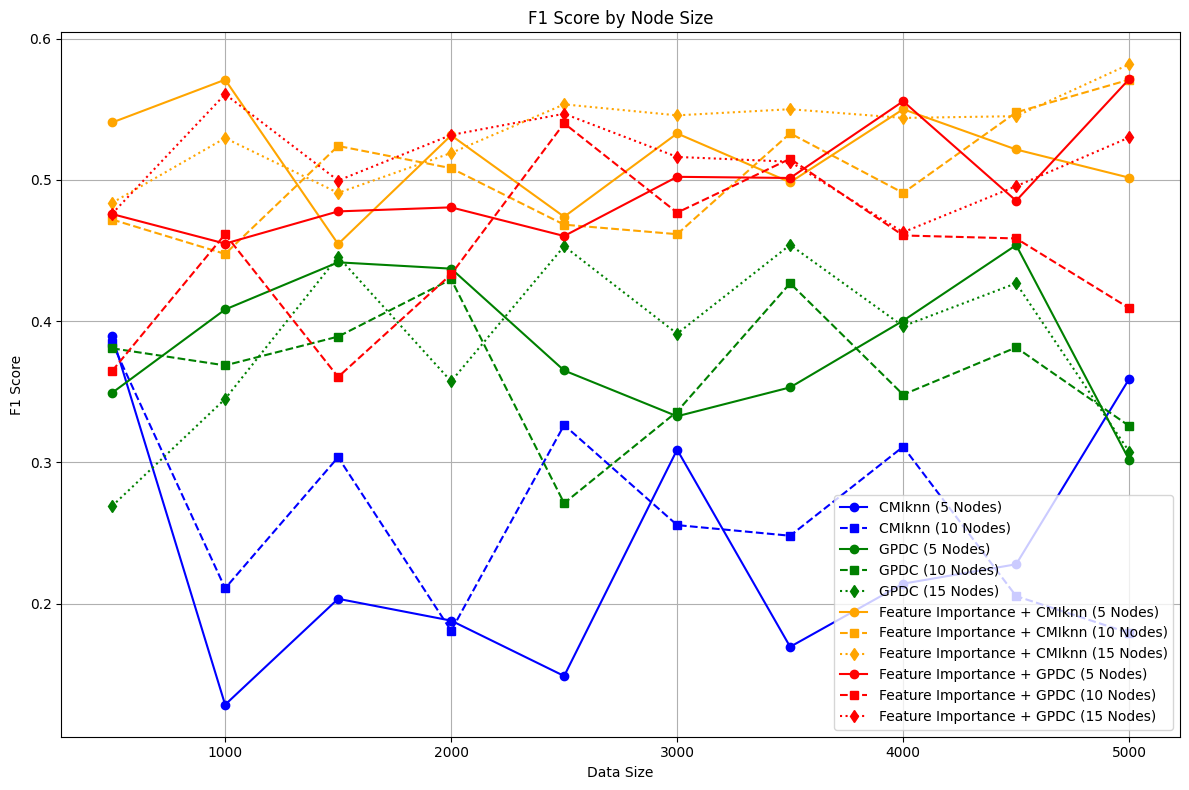

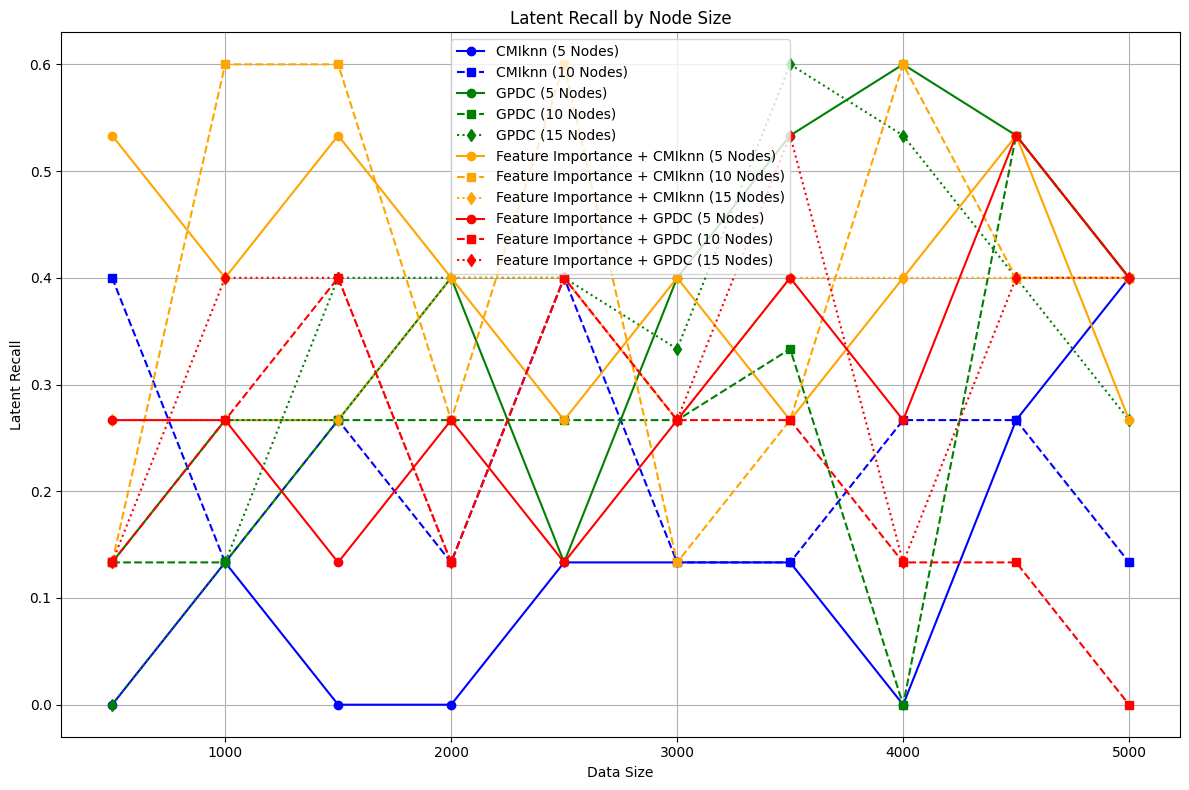

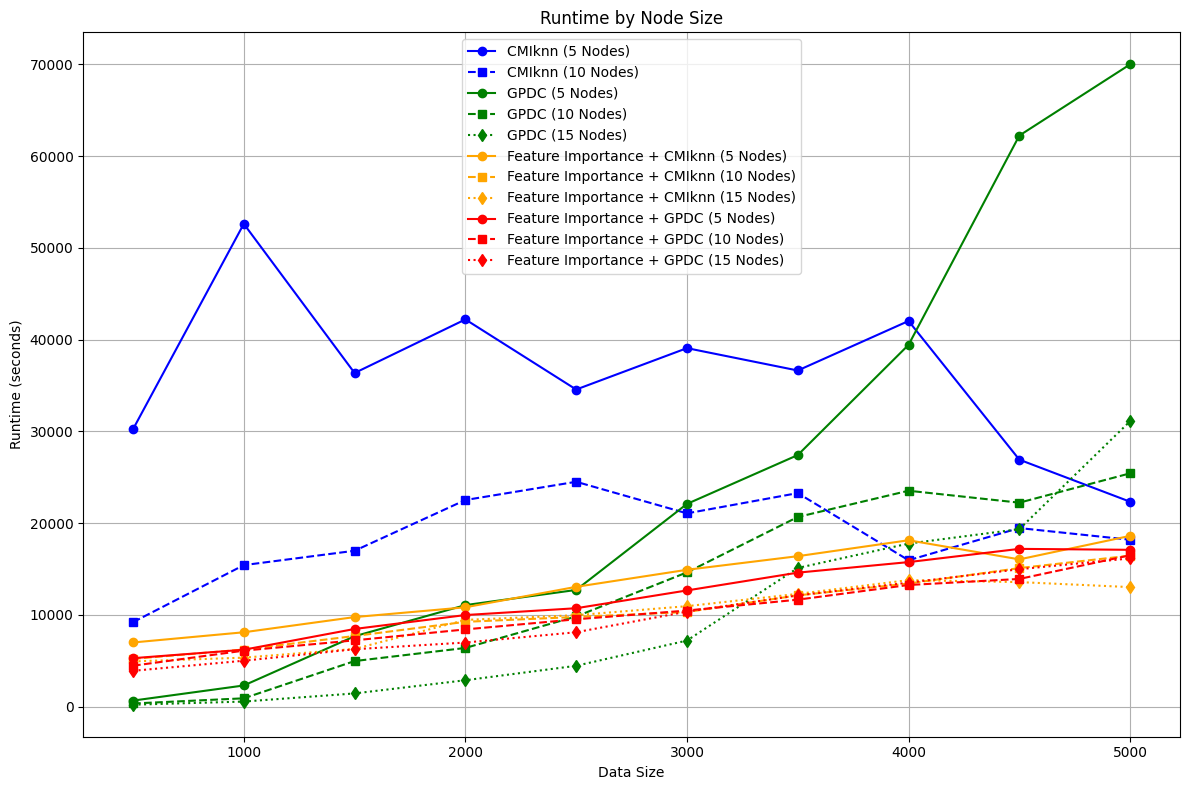

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Example data structure for different node sizes
node_sizes = ['5 Nodes', '10 Nodes', '15 Nodes']

methods = {
    'CMIknn': {'5 Nodes': cmiknn_5, '10 Nodes': cmiknn_10},#, '15 Nodes': cmiknn_15},
    'GPDC': {'5 Nodes': gpdc_5, '10 Nodes': gpdc_10, '15 Nodes': gpdc_15},
    'Feature Importance + CMIknn': {'5 Nodes': feat_cmiknn_5, '10 Nodes': feat_cmiknn_10, '15 Nodes': feat_cmiknn_15},
    'Feature Importance + GPDC': {'5 Nodes': feat_gpdc_5, '10 Nodes': feat_gpdc_10, '15 Nodes': feat_gpdc_15},
}

# Function to compute mean values for plotting
def compute_mean_values(df, column):
    agg_df = df.groupby('Data').agg(mean=(column, 'mean'))
    return agg_df

# Plot configuration
line_styles = ['solid', 'dashed', 'dotted']
markers = ['o', 's', 'd']
colors = ['blue', 'green', 'orange', 'red']  # One color per method

# Visualization function for metrics
def plot_metric(metric, ylabel, title):
    plt.figure(figsize=(12, 8))
    
    for method_idx, (method, data_by_nodes) in enumerate(methods.items()):
        color = colors[method_idx]
        for node_idx, (node_size, df) in enumerate(data_by_nodes.items()):
            agg_data = compute_mean_values(df, metric)
            plt.plot(
                agg_data.index,
                agg_data['mean'],
                label=f"{method} ({node_size})",
                color=color,
                linestyle=line_styles[node_idx],
                marker=markers[node_idx],
            )
    
    plt.title(title)
    plt.xlabel('Data Size')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot F1 Score
plot_metric('F1 Score', 'F1 Score', 'F1 Score by Node Size')

# Plot Latent Recall
plot_metric('Recall', 'Latent Recall', 'Latent Recall by Node Size')

# Plot Runtime
plot_metric('Elapsed Time (s)', 'Runtime (seconds)', 'Runtime by Node Size')


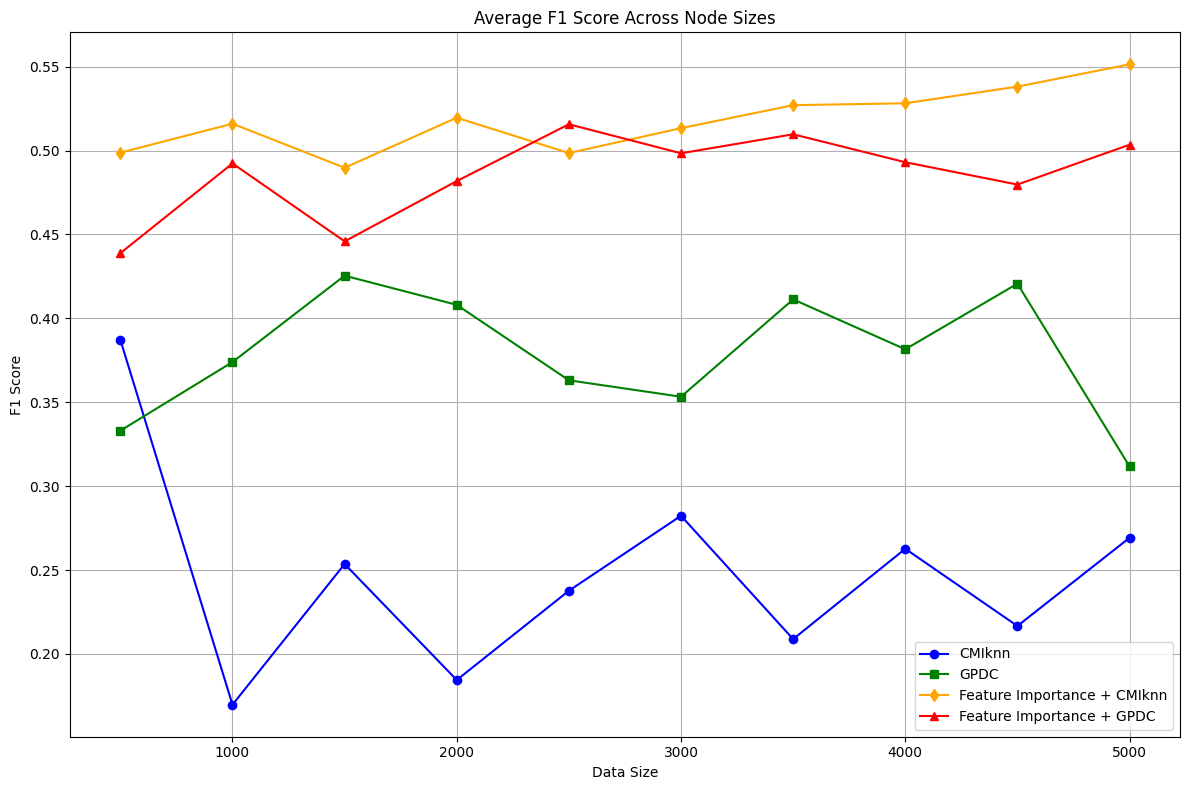

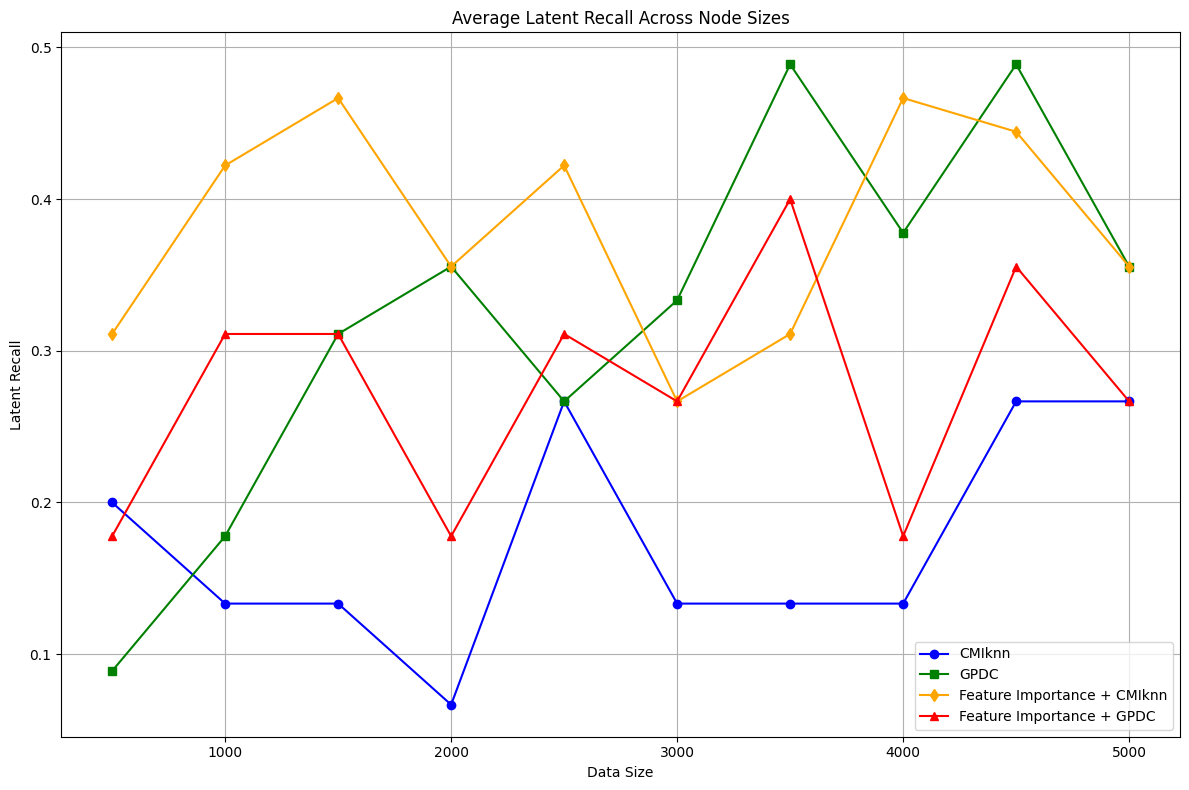

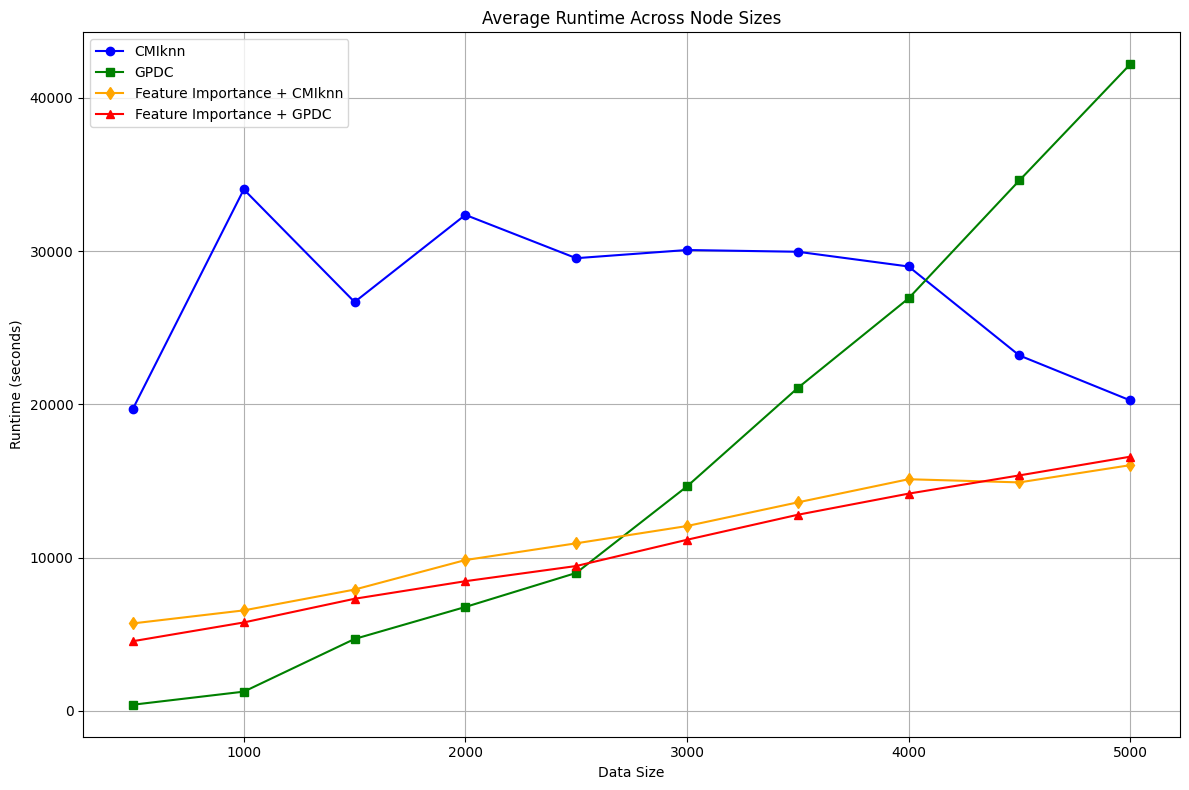

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Example data structure for different node sizes
methods = {
    'CMIknn': {'5 Nodes': cmiknn_5, '10 Nodes': cmiknn_10},#, '15 Nodes': cmiknn_15},
    'GPDC': {'5 Nodes': gpdc_5, '10 Nodes': gpdc_10, '15 Nodes': gpdc_15},
    'Feature Importance + CMIknn': {'5 Nodes': feat_cmiknn_5, '10 Nodes': feat_cmiknn_10, '15 Nodes': feat_cmiknn_15},
    'Feature Importance + GPDC': {'5 Nodes': feat_gpdc_5, '10 Nodes': feat_gpdc_10, '15 Nodes': feat_gpdc_15},
}

# Function to average across node sizes
def compute_average_across_sizes(dfs, column):
    combined_df = pd.concat(dfs)
    agg_df = combined_df.groupby('Data').agg(mean=(column, 'mean'))
    return agg_df

# Plot configuration
markers = ['o', 's', 'd', '^']
colors = ['blue', 'green', 'orange', 'red']  # One color per method

# Visualization function for metrics
def plot_metric(metric, ylabel, title):
    plt.figure(figsize=(12, 8))
    
    for method_idx, (method, dfs) in enumerate(methods.items()):
        color = colors[method_idx]
        marker = markers[method_idx]
        
        agg_data = compute_average_across_sizes(dfs, metric)
        plt.plot(
            agg_data.index,
            agg_data['mean'],
            label=method,
            color=color,
            marker=marker,
        )
    
    plt.title(title)
    plt.xlabel('Data Size')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot F1 Score
plot_metric('F1 Score', 'F1 Score', 'Average F1 Score Across Node Sizes')

# Plot Latent Recall
plot_metric('Recall', 'Latent Recall', 'Average Latent Recall Across Node Sizes')

# Plot Runtime
plot_metric('Elapsed Time (s)', 'Runtime (seconds)', 'Average Runtime Across Node Sizes')


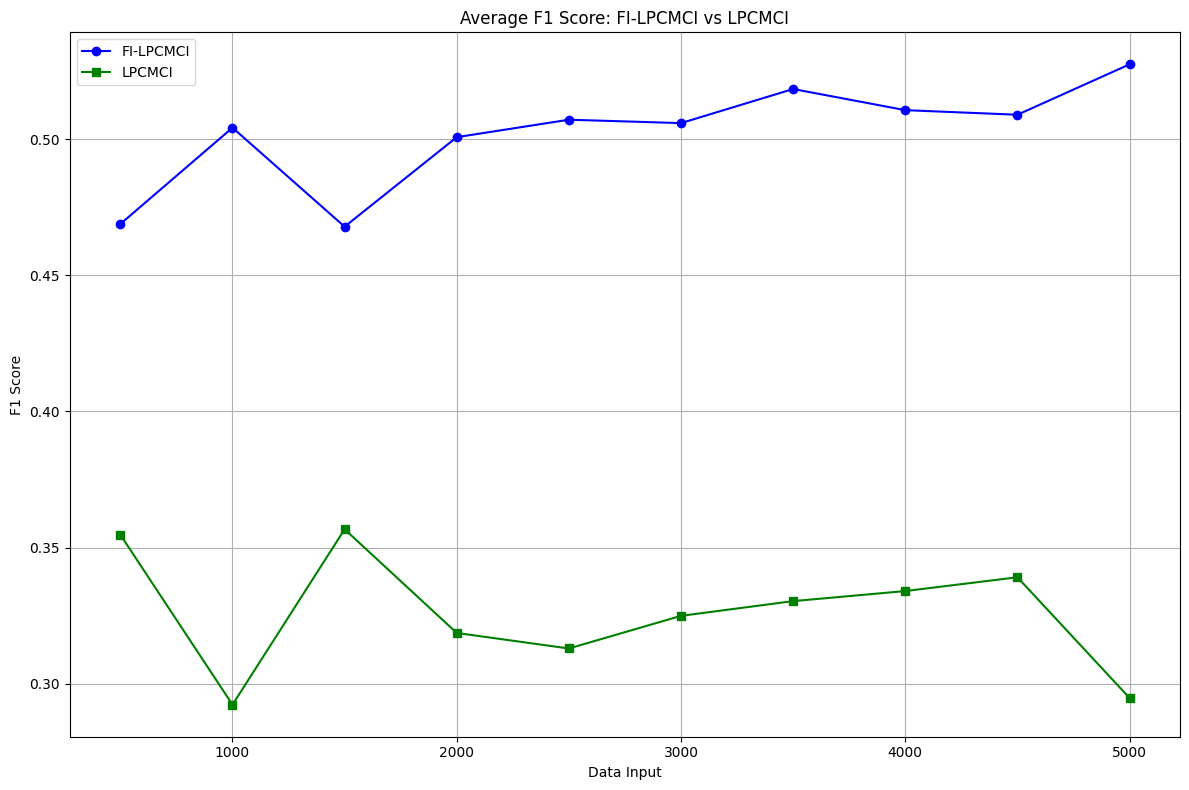

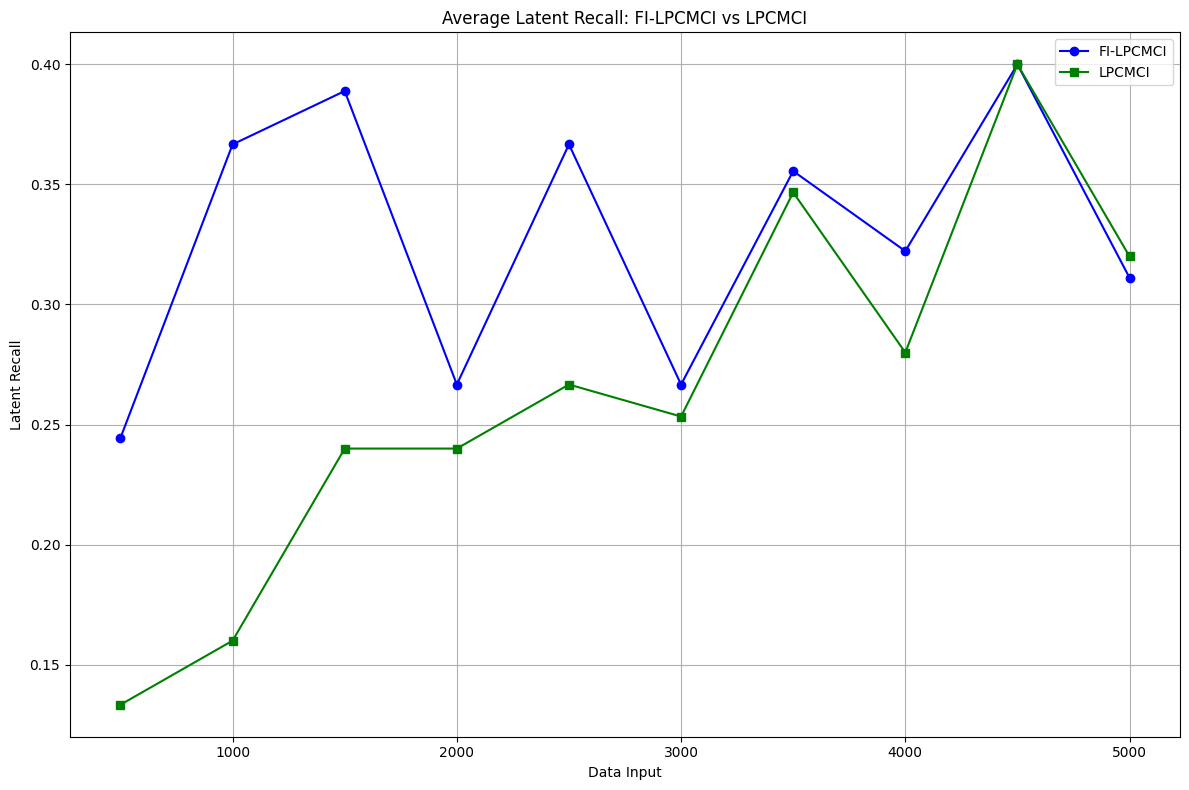

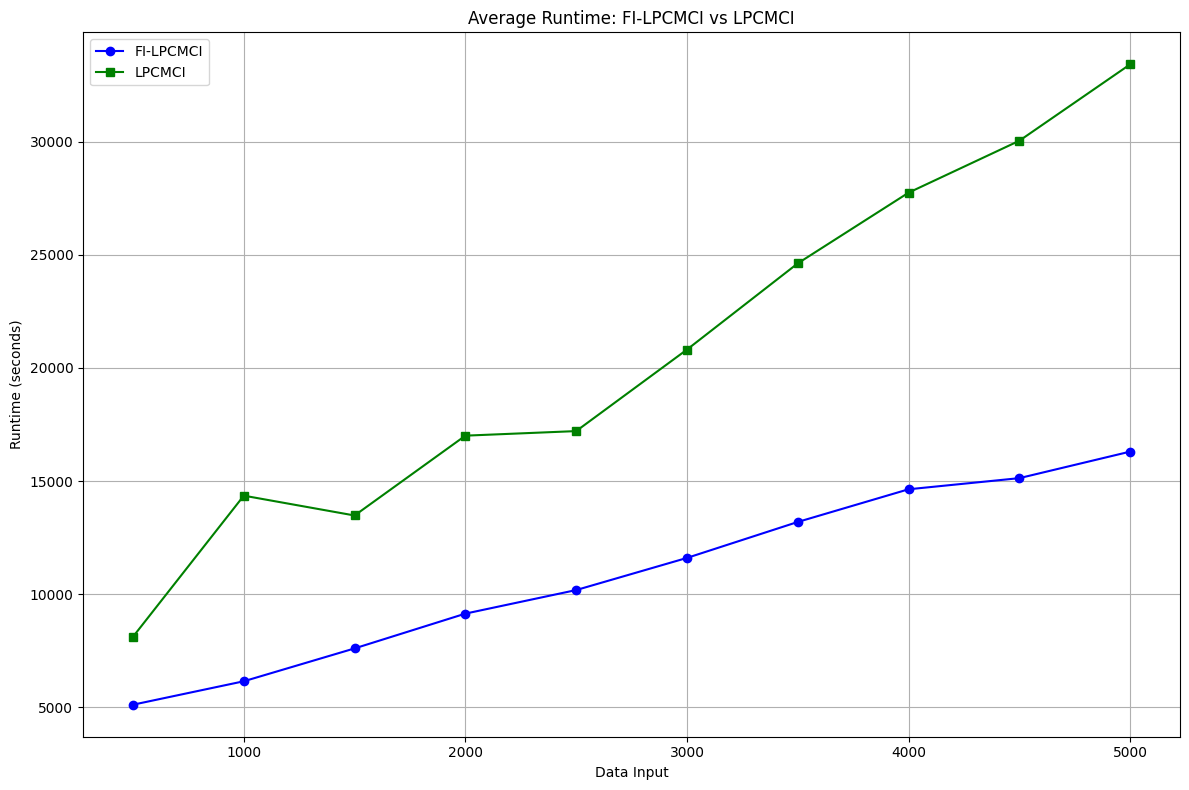

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Data structure for grouping
methods = {
    'FI-LPCMCI': [feat_cmiknn_5, feat_gpdc_5, feat_cmiknn_10, feat_gpdc_10, feat_cmiknn_15, feat_gpdc_15],
    'LPCMCI': [cmiknn_5, cmiknn_10, gpdc_5, gpdc_10, gpdc_15],
}

# Function to average data across all node sizes
def compute_average_across_sizes(dfs, column):
    combined_df = pd.concat(dfs)
    agg_df = combined_df.groupby('Data').agg(mean=(column, 'mean'))
    return agg_df

# Plot configuration
colors = ['blue', 'green']  # One color for each group
markers = ['o', 's']

# Visualization function
def plot_metric(metric, ylabel, title):
    plt.figure(figsize=(12, 8))
    
    for idx, (label, dfs) in enumerate(methods.items()):
        color = colors[idx]
        marker = markers[idx]
        
        agg_data = compute_average_across_sizes(dfs, metric)
        plt.plot(
            agg_data.index,
            agg_data['mean'],
            label=label,
            color=color,
            marker=marker,
        )
    
    plt.title(title)
    plt.xlabel('Data Input')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot F1 Score
plot_metric('F1 Score', 'F1 Score', 'Average F1 Score: FI-LPCMCI vs LPCMCI')

# Plot Latent Recall
plot_metric('Recall', 'Latent Recall', 'Average Latent Recall: FI-LPCMCI vs LPCMCI')

# Plot Runtime
plot_metric('Elapsed Time (s)', 'Runtime (seconds)', 'Average Runtime: FI-LPCMCI vs LPCMCI')


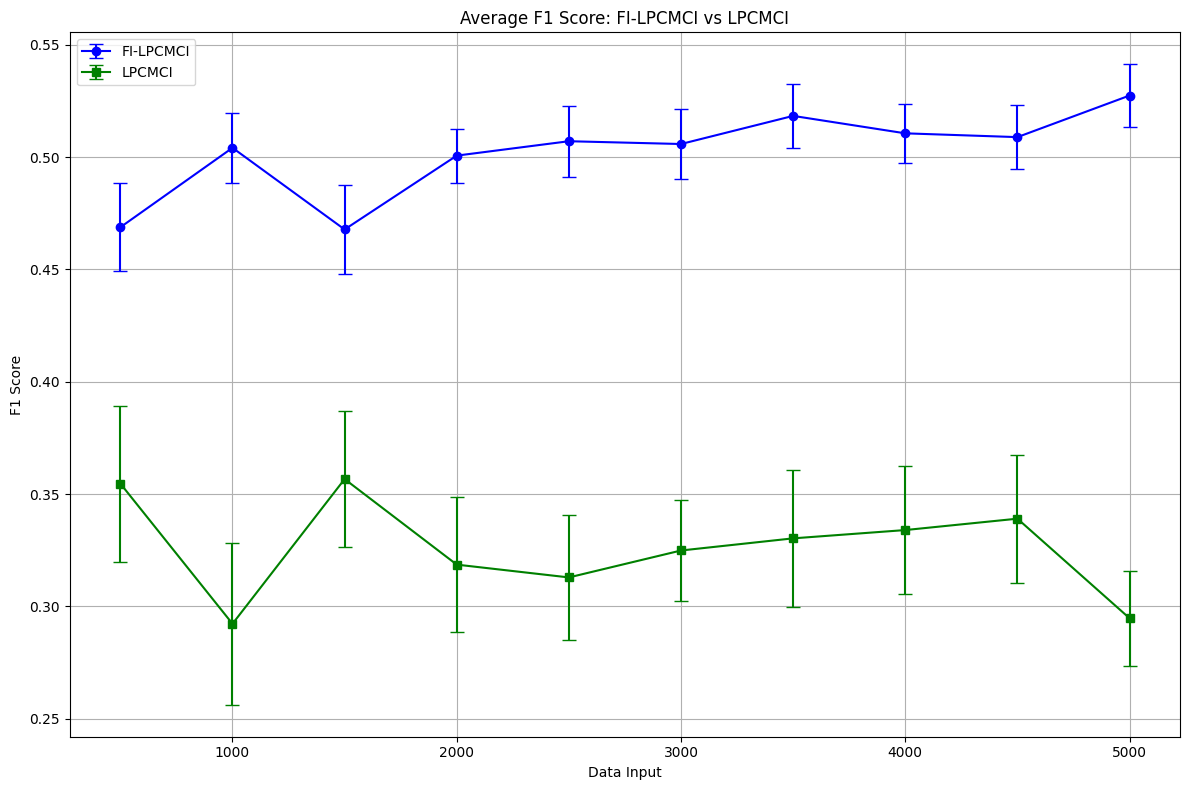

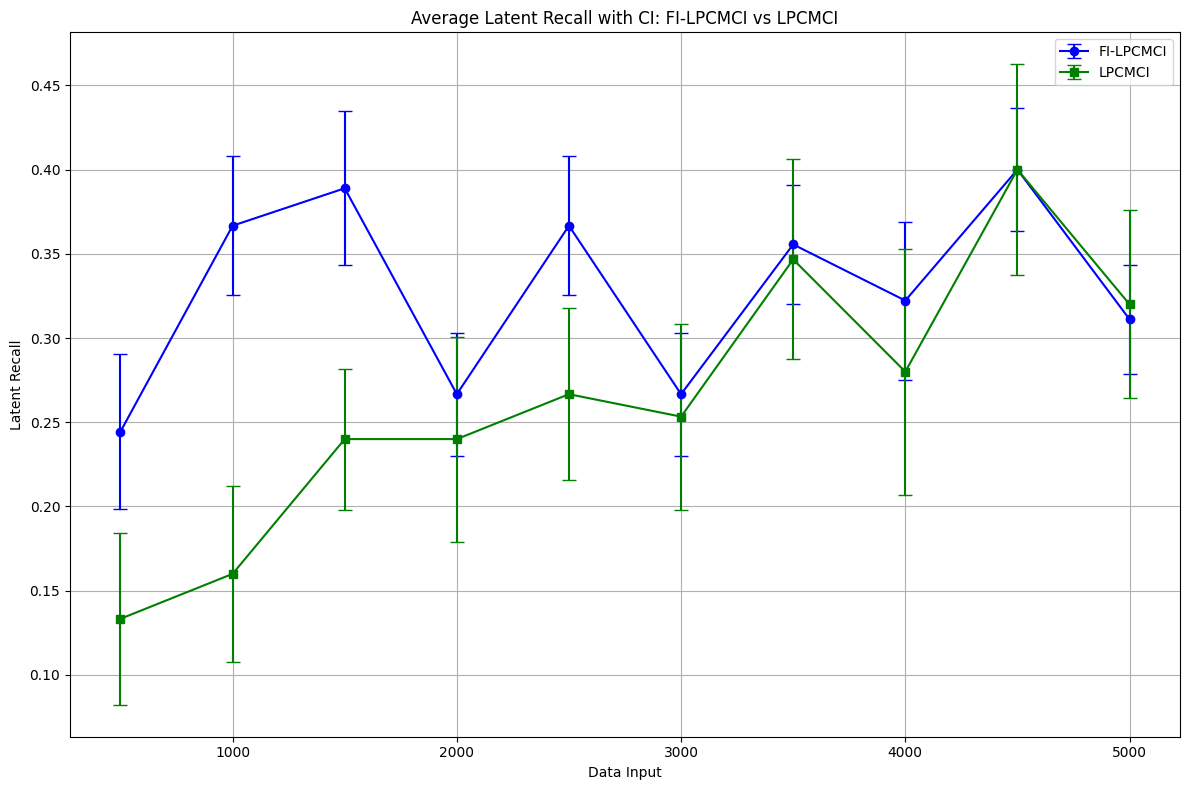

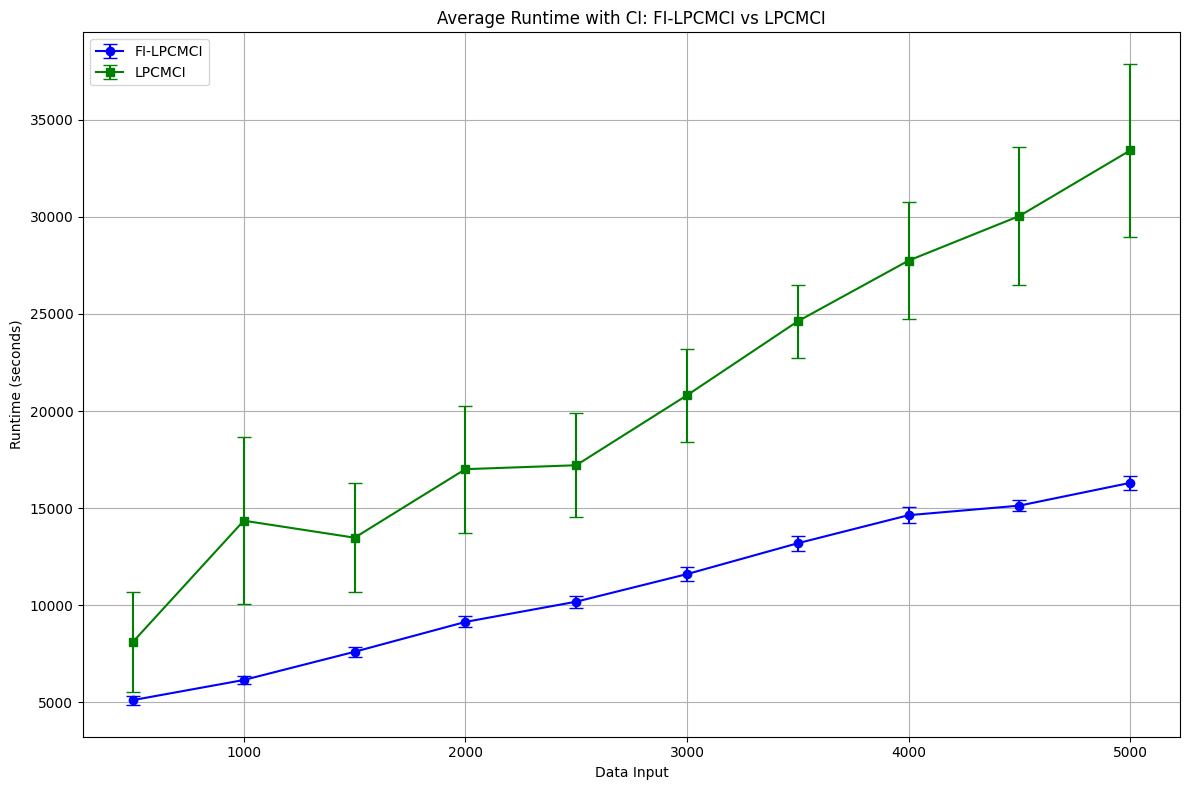

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Data structure for grouping
methods = {
    'FI-LPCMCI': [feat_cmiknn_5, feat_gpdc_5, feat_cmiknn_10, feat_gpdc_10, feat_cmiknn_15, feat_gpdc_15],
    'LPCMCI': [cmiknn_5, cmiknn_10, gpdc_5, gpdc_10, gpdc_15],
}

# Function to compute mean and confidence intervals
def compute_statistics(dfs, column):
    combined_df = pd.concat(dfs)
    agg_df = combined_df.groupby('Data').agg(
        mean=(column, 'mean'),
        std=(column, 'std'),
        count=(column, 'count')
    )
    # Calculate standard error and 95% confidence intervals
    agg_df['sem'] = agg_df['std'] / np.sqrt(agg_df['count'])
    agg_df['ci'] = .8 * agg_df['sem']  # 95% confidence interval
    return agg_df

# Plot configuration
colors = ['blue', 'green']  # One color for each group
markers = ['o', 's']

# Visualization function
def plot_metric_with_ci(metric, ylabel, title):
    plt.figure(figsize=(12, 8))
    
    for idx, (label, dfs) in enumerate(methods.items()):
        color = colors[idx]
        marker = markers[idx]
        
        agg_data = compute_statistics(dfs, metric)
        plt.errorbar(
            agg_data.index,
            agg_data['mean'],
            yerr=agg_data['ci'],
            label=label,
            color=color,
            marker=marker,
            capsize=5
        )
    
    plt.title(title)
    plt.xlabel('Data Input')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot F1 Score
plot_metric_with_ci('F1 Score', 'F1 Score', 'Average F1 Score: FI-LPCMCI vs LPCMCI')

# Plot Latent Recall
plot_metric_with_ci('Recall', 'Latent Recall', 'Average Latent Recall with CI: FI-LPCMCI vs LPCMCI')

# Plot Runtime
plot_metric_with_ci('Elapsed Time (s)', 'Runtime (seconds)', 'Average Runtime with CI: FI-LPCMCI vs LPCMCI')
